In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

In [2]:
galaxia_data = pd.read_csv("../datos/SDSS-DR14.csv") #importamos conjunto de datos
galaxia_data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [23]:
#Trasladamos la columna de clases al principio de la tabla para simplicidad de datos

cls = galaxia_data[['class']] #extraemos columna "class" para generar variables dummies
galaxia_data1 = galaxia_data.drop(['class'], axis=1) #eliminamos la columna categórica discreta
galaxia_data1 = pd.concat([cls, galaxia_data1],axis=1) #concatenamos data general + columnas binarias
galaxia_data1.head()

,class,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,STAR,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491
1,STAR,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541
2,GALAXY,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513
3,STAR,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510
4,STAR,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512


In [4]:
galaxia_data1.isnull().sum() #verificamos no tener contenidos nulos

class        0
objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

<Axes: >

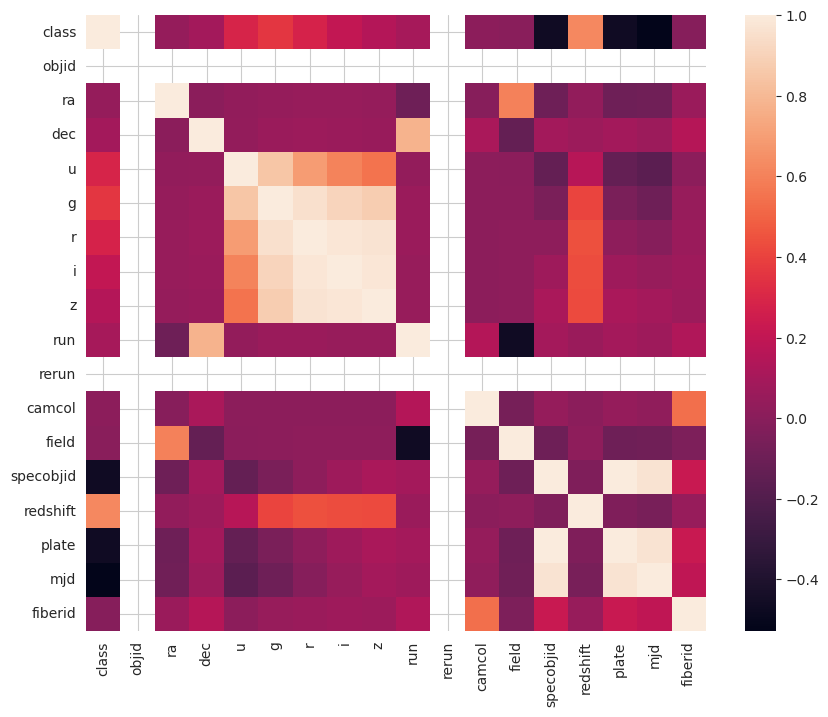

In [24]:
#código solamente para efecto práctico de mapa de calor
df2_test = galaxia_data1[['class']]
df2_cp = galaxia_data1
for n in range(df2_test.shape[0]):
    if df2_test.iloc[n,0] =='STAR':
        df2_test.iloc[n,0] = 1
    elif df2_test.iloc[n,0] =='GALAXY':
        df2_test.iloc[n,0] = 2
    elif df2_test.iloc[n,0] =='QSO':
        df2_test.iloc[n,0] = 3
df2_test.head()

df2_cut = df2_cp.drop(['class'],axis=1)
df2_plot = pd.concat([df2_test,df2_cut],axis=1)
#Print
sb.heatmap(df2_plot.corr())

In [25]:
galaxia_data_clean = galaxia_data1
galaxia_data_clean.info() #verificamos no tener variables no numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   class      10000 non-null  object 
 1   objid      10000 non-null  float64
 2   ra         10000 non-null  float64
 3   dec        10000 non-null  float64
 4   u          10000 non-null  float64
 5   g          10000 non-null  float64
 6   r          10000 non-null  float64
 7   i          10000 non-null  float64
 8   z          10000 non-null  float64
 9   run        10000 non-null  int64  
 10  rerun      10000 non-null  int64  
 11  camcol     10000 non-null  int64  
 12  field      10000 non-null  int64  
 13  specobjid  10000 non-null  float64
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [26]:
galaxia_data_clean.info() #validamos que todas las variables sean numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   class      10000 non-null  object 
 1   objid      10000 non-null  float64
 2   ra         10000 non-null  float64
 3   dec        10000 non-null  float64
 4   u          10000 non-null  float64
 5   g          10000 non-null  float64
 6   r          10000 non-null  float64
 7   i          10000 non-null  float64
 8   z          10000 non-null  float64
 9   run        10000 non-null  int64  
 10  rerun      10000 non-null  int64  
 11  camcol     10000 non-null  int64  
 12  field      10000 non-null  int64  
 13  specobjid  10000 non-null  float64
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [27]:
#Separamos las variables categóricas(X) con las descriptivas(y)
X = galaxia_data_clean.iloc[:,1:galaxia_data_clean.shape[1]].values
y = galaxia_data_clean.iloc[:,0].values

In [28]:
y

array(['STAR', 'STAR', 'GALAXY', ..., 'STAR', 'GALAXY', 'GALAXY'],
      dtype=object)

In [29]:
#Realizando Entrenamiento a 70% de acierto
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [30]:
from sklearn.linear_model import LogisticRegression

#Aprendizaje
LogReg = LogisticRegression(max_iter=1000,penalty='l1',solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [31]:
#Predicciones
y_pred = LogReg.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1429    3   21]
 [  24  223    0]
 [  16    0 1284]]
              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.98      1453
         QSO       0.99      0.90      0.94       247
        STAR       0.98      0.99      0.99      1300

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000

